# This Notebook allows you to run any Network on the fingernails dataset
Just simply set the paths and parameters and run it

In [2]:
%load_ext autoreload
%autoreload 2
## imports
from util.LoadData import loadFingernails

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

from __future__ import print_function

import sys
import os
import time
import string
import random
import pickle
import argparse

import numpy as np
import theano
import theano.tensor as T
import lasagne

from sklearn.metrics import r2_score


## SET GLOBAL VARIABLES WHICH ARE NEEDED BY ALL CNNS

In [3]:
## variables

fingernailsPath = "../dataset/s1Whitened.mat"
epochs=100
lr_rate=0.001
context="forces" ## [forces, torques, surface]
augment=False ## If true syntetic data will be added by rotating and mirroring

## LOADS THE FINGERNAIL DATASET

In [4]:
## Loading
(X_train, Y_train), (X_valid, Y_valid), \
            (X_test, Y_test) = loadFingernails(path=fingernailsPath, shared=False, context=context, augment=augment)
## Prepare Theano variables for inputs and targets
input_var = T.tensor4('inputs')
target_var = T.matrix('targets')

## RUN THIS IF YOU WANT TO RUN THE RESNET IMPLEMENTATION

In [6]:
from base.ResNet import ResNet

## resnet variables
cropShape = (105,111)
blocks_length=1
init_filter_count=2
n_prediction=Y_train.shape[1]

cnn = ResNet(input_var, target_var, cropShape, n_prediction, blocks_length, init_filter_count)

number of parameters in model: 6065


## COMPILES THE FUNCTIONS FOR TRAINING AND VALIDATION

In [7]:
cnn.compile(lr_rate)

# TRAINS THE NETWORK WITH THE SPECIFIED PARAMETERS
Uncomment if you want to do a real run

In [10]:
exportLive=True
exportTxtFileLive="loss_resi_live.csv"

##DEBUG COMMENT OUT FOR LIVE RUN##
X_train = X_train[:50]
Y_train = Y_train[:50]
X_valid = X_valid[:50]
Y_valid = Y_valid[:50]
X_test = X_test[:50]
Y_test = Y_test[:50]
epochs = 2
################################

cnn.train(X_train, Y_train, X_valid, Y_valid, X_test, Y_test,  epochs,\
           exportLive=exportLive, exportTxtFile=exportTxtFileLive)

Starting training...
Epoch 1 of 2 took 1.233s
  training loss:		1.801693
  validation loss:		1.526272
  test loss:		1.340438
Epoch 2 of 2 took 1.199s
  training loss:		1.600876
  validation loss:		1.437478
  test loss:		1.263785


## PLOTS THE RESULTS OF THE TRAINING

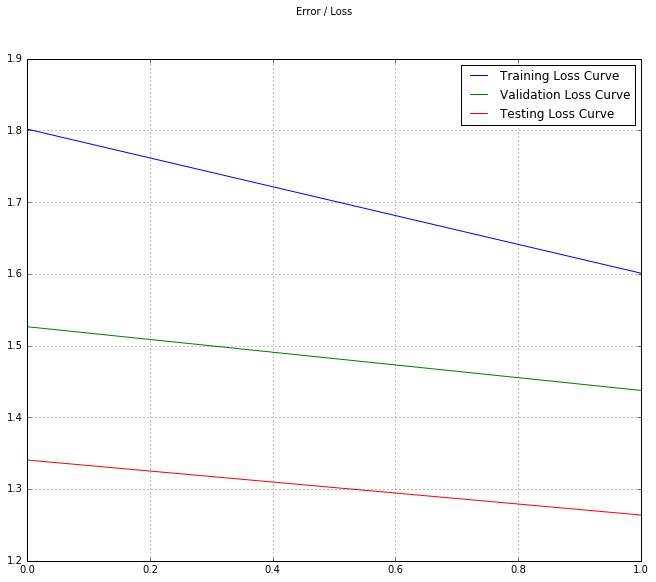

In [15]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from util.Exporter import plotError

fig = plt.figure(1, figsize = (11, 9))
plt.suptitle('Error / Loss')
_ = plt.grid(True)

# plot the hat function
ax = []
ax.append(plt.plot(cnn.trainRes[0], cnn.trainRes[1], label="Training Loss Curve"))
ax.append(plt.plot(cnn.valRes[0], cnn.valRes[1], label="Validation Loss Curve"))
ax.append(plt.plot(cnn.testRes[0], cnn.testRes[1], label="Testing Loss Curve "))

    
_ = plt.legend()
_ = plt.show()

## EXPORTS THE RESULT INTO THE SPECIFIED CSV

In [30]:
from util.Exporter import csvExport
exportTxtFile="loss_res.csv"
csvExport(cnn.trainRes, cnn.valRes, cnn.testRes, exportTxtFile)

## EXPORTS THE MODELS PARAMETERS FOR LATER USE

In [28]:
from util.Exporter import exportModel
exportModelFile="forcesNet.npz"
exportModel(exportModelFile, cnn.cnn)